In [25]:
from sklearn.datasets import make_classification

X, y = make_classification(
    shuffle=True,
    n_repeated=0,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_samples=10000,
    random_state=0xD,
)

In [26]:
import numpy as np

labeled_samples_count = 2000
unlabeled_indices = np.arange(len(X))[labeled_samples_count:]

# Copy labels vector and remove some labels to simulate their absence
y_train = np.copy(y)
y_train[unlabeled_indices] = -1  # Remove class, -1 means unlabeled

In [27]:
from sklearn.semi_supervised import LabelSpreading

model = LabelSpreading(gamma=1, max_iter=20)
model.fit(X, y_train)

LabelSpreading(gamma=1, max_iter=20)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      3982
           1       0.85      0.84      0.84      4018

    accuracy                           0.84      8000
   macro avg       0.84      0.84      0.84      8000
weighted avg       0.84      0.84      0.84      8000



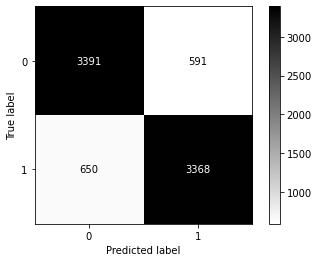

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

predicted_labels = model.transduction_[unlabeled_indices]
true_labels = y[unlabeled_indices]

ConfusionMatrixDisplay.from_predictions(
    y_true=true_labels,
    y_pred=predicted_labels,
    cmap='binary',
)

print(classification_report(y_true=true_labels, y_pred=predicted_labels))